In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

### Exercise 1

You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

#### Load dataset

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


5


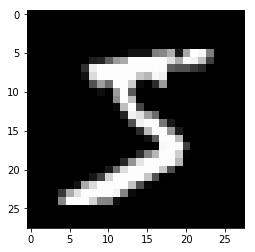

In [3]:
plt.imshow(X_train[0], cmap='gray');
print(y_train[0])

7


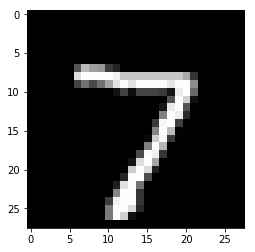

In [4]:
plt.imshow(X_test[0], cmap='gray');
print(y_test[0])

#### Feature Engineering X

In [5]:
# Normalize X
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert to tensor
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### One hot encoding y

In [6]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


#### Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation
import keras.backend as K

K.clear_session()

model = Sequential()

# Feature Extraction layers
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Activation('relu'))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # Classification Outputs

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

In [8]:
history = model.fit(
    X_train, y_train_cat,
    batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 46s 1ms/step - loss: 0.3349 - acc: 0.8962 - val_loss: 0.2079 - val_acc: 0.9388
Epoch 2/5
42000/42000 [==============================] - 38s 911us/step - loss: 0.0858 - acc: 0.9742 - val_loss: 0.0653 - val_acc: 0.9814
Epoch 3/5
42000/42000 [==============================] - 29s 696us/step - loss: 0.0658 - acc: 0.9805 - val_loss: 0.0725 - val_acc: 0.9789
Epoch 4/5
42000/42000 [==============================] - 31s 728us/step - loss: 0.0501 - acc: 0.9858 - val_loss: 0.0597 - val_acc: 0.9843
Epoch 5/5
42000/42000 [==============================] - 34s 807us/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0634 - val_acc: 0.9851


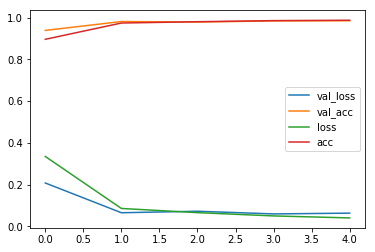

In [9]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

#### Evaluate

In [10]:
result = model.evaluate(X_test, y_test_cat)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')

10000/10000 [==============================] - 5s 461us/step


[0.04612397954766593, 0.9872]

Accuracy: 98.72 %


### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane [0]
- automobile [1]
- bird [2]
- cat [3]
- deer [4]
- dog [5]
- frog [6]
- horse [7]
- ship [8]
- truck [9]

In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of X_train, does it need reshape?
- check the scale of X_train, does it need rescaling?
- check the shape of y_train, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow (as expected) stop the execution and move to the next session!

#### Load dataset

In [11]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)

(10000, 32, 32, 3)
(10000, 1)


[6]


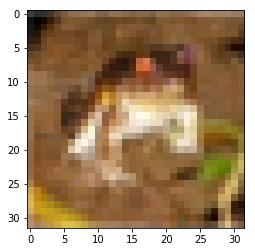

In [12]:
display(plt.imshow(X_train[0]))
print(y_train[0])

[9]


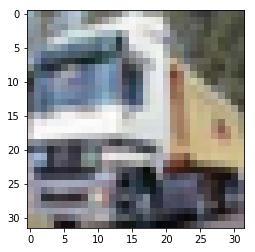

In [13]:
display(plt.imshow(X_train[1]))
print(y_train[1])

#### Feature Engineering X

In [14]:
# Normalize X
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert to tensor
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### One hot encoding y

In [15]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat.shape)
print(y_test_cat.shape)

(50000, 10)
(10000, 10)


#### Model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation
import keras.backend as K

K.clear_session()

model = Sequential()

# Feature Extraction layers
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 input_shape=(32, 32, 3),
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Activation('relu'))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 64)          0         
__________

In [17]:
history = model.fit(
    X_train, y_train_cat,
    batch_size=32, epochs=20, verbose=1,
    validation_split=0.25, shuffle=True)

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 130s 3ms/step - loss: 1.4562 - acc: 0.4788 - val_loss: 1.1855 - val_acc: 0.5918
Epoch 2/20
37500/37500 [==============================] - 128s 3ms/step - loss: 0.9794 - acc: 0.6583 - val_loss: 0.9977 - val_acc: 0.6584
Epoch 3/20
37500/37500 [==============================] - 126s 3ms/step - loss: 0.7854 - acc: 0.7299 - val_loss: 0.8440 - val_acc: 0.7137
Epoch 4/20
37500/37500 [==============================] - 128s 3ms/step - loss: 0.6478 - acc: 0.7779 - val_loss: 0.7857 - val_acc: 0.7373
Epoch 5/20
37500/37500 [==============================] - 128s 3ms/step - loss: 0.5386 - acc: 0.8162 - val_loss: 0.8691 - val_acc: 0.7470
Epoch 6/20
37500/37500 [==============================] - 125s 3ms/step - loss: 0.4553 - acc: 0.8453 - val_loss: 0.8172 - val_acc: 0.7482
Epoch 7/20
37500/37500 [==============================] - 105s 3ms/step - loss: 0.3992 - acc: 0.8652 - val_loss: 1.0772 - 

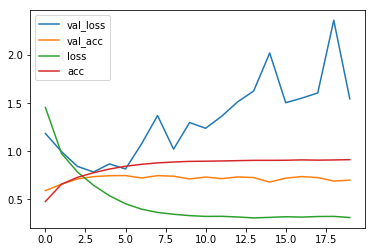

In [18]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

#### Evaluate

In [19]:
result = model.evaluate(X_test, y_test_cat)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')

10000/10000 [==============================] - 7s 718us/step


[1.6424154914855957, 0.6854]

Accuracy: 68.54 %
